Bellabeat Case Study - How can the tech company play it smart? 

Komi Golo  

2023-01-30

## **How can a wellness company play it smart?**

#### **Summary**   


Bellabeat is a high-tech company that manufactures health-focused smart products, with data collected on activity, sleep, stress, and reproductive health to empower women with knowledge about their own health and habits.
Our task is to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices.
Bellabeat’s app will be the product to analyze in order to gain insight into users’ current habits and provide recommendations to the marketing analytics team on our findings.

## **The ASK Phase:** 

#### **Business Task:** 

Analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart devices and select one Bellabeat product to apply these insights to in your presentation.

#### **Key Stakeholders:**  

Urška Sršen and Sando Mur: Bellabeat founders

Bellabeat’s Marketing Analytics Team

## The PREPARE Phase: 

#### **Load Packages to work with** 

I used the FitBit Fitness Tracker Data (public data) recommended by Sršen. This data set contains personal fitness tracker from 30 FitBit users, including minute-level output for physical activity, heart rate, and sleep monitoring.

The data set has some limitations, including the limited sample used by only 30 users. It was generated in 2016, over a period of only 2 months which do not make it as current as we would like it to.
The data is organized in a long format, with 18 CSV documents to analyze. Every user has a unique ID and different rows since the data is tracked by date and time.

The activity dataset contains 940 rows and 15 columns describing the total steps, distance and calories burnt by each user.

In [1]:
library("tidyverse")
## ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
## ✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
## ✔ tibble  3.1.8      ✔ dplyr   1.0.10
## ✔ tidyr   1.3.0      ✔ stringr 1.5.0 
## ✔ readr   2.1.3      ✔ forcats 0.5.2 
## ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
## ✖ dplyr::filter() masks stats::filter()
## ✖ dplyr::lag()    masks stats::lag()
library("lubridate")
## 
## Attaching package: 'lubridate'
## 
## The following objects are masked from 'package:base':
## 
##     date, intersect, setdiff, union
library("ggpubr")
library(ggpubr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




#### **Upload Dataset to R** 


In [2]:
activity <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
hourly_calories <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourly_intensities <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourly_steps <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
sleep <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22099 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (3): Id, TotalIntensity, AverageIntensity

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_ty

#### **Display structure of the data**  


In [3]:
str(activity)


spc_tbl_ [940 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 221 1

In [4]:
str(hourly_calories)
str(hourly_intensities)
str(hourly_steps)
str(sleep)
str(weight)


spc_tbl_ [22,099 × 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id          : num [1:22099] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: chr [1:22099] "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ Calories    : num [1:22099] 81 61 59 47 48 48 48 47 68 141 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityHour = col_character(),
  ..   Calories = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 
spc_tbl_ [22,099 × 4] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id              : num [1:22099] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour    : chr [1:22099] "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ TotalIntensity  : num [1:22099] 20 8 7 0 0 0 0 0 13 30 ...
 $ AverageIntensity: num [1:22099] 0.333 0.133 0.117 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityHour = col_character(),
  .. 

The 'activity' dataset contains 940 rows and 15 columns describing the total steps, distance and calories burnt by each user.

The 'hourly_calories' dataset contains 22099 observations with 3 columns describing about the calories burnt by user at each hour.

The 'hourly_intensities' contains 22099 observations with 4 columns describing about the total and average intensities of each user.

The 'hourly_steps' dataset contains 22099 observations with 3 columns describing about the total steps taken by each user.

The 'sleep' dataset contains 413 observations with 5 columns describing about total sleep time and total time in bed.

The 'weight' dataset contains 67 observations with 8 columns describing about weight, fat and BMI of each user.

#### **Identity and Print number of Id**


In [5]:
cat(length(unique(activity$Id)))


33

In [6]:
cat(length(unique(hourly_calories$Id)))


33

In [7]:
cat(length(unique(hourly_intensities$Id)))


33

In [8]:
cat(length(unique(hourly_steps$Id)))


33

In [9]:
cat(length(unique(sleep$Id)))


24

In [10]:
cat(length(unique(weight$Id)))


8

All the datasets contain 33 unique Ids except for the sleep (24) and weight (8) data sets.


## **The PROCESS Phase**

#### **Find Duplicates**

In [11]:
anyDuplicated(activity)
anyDuplicated(hourly_calories)
anyDuplicated(hourly_intensities)
anyDuplicated(hourly_steps)
anyDuplicated(sleep)
anyDuplicated(weight)


[1] 0

[1] 0

[1] 0

[1] 0

[1] 162

[1] 0


We determine that sleep data set contains 162 duplicates.
From there, we were able to delete the duplicated values.

In [12]:
sleep <- sleep %>%
  distinct() %>%
  drop_na()

#### **Find Null Values**


Second, we worked on finding null values. 
The Fat column revealed to contain numerous null values and we removed it from the data set.

In [13]:
nrow(activity)-sum(complete.cases(activity))
nrow(hourly_calories)-sum(complete.cases(hourly_calories))
nrow(hourly_intensities)-sum(complete.cases(hourly_intensities))
nrow(hourly_steps)-sum(complete.cases(hourly_steps))
nrow(sleep)-sum(complete.cases(sleep))
nrow(weight)-sum(complete.cases(weight))


[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 65

We determined that the weight data set contains 65 null values.


In [14]:
head(weight)
weight$Fat

Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


[1] 22 NA NA NA NA 25 NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[26] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[51] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA

With only 2 non null values in the Fat column, it's best to completely remove it


In [15]:
weight <- select(weight,-Fat)
head(weight)

Id,Date,WeightKg,WeightPounds,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,27.45,TRUE,1.460938e+12


#### **Fix date to ensure consistency**


In [16]:
activity$ActivityDate <- mdy(activity$ActivityDate)
hourly_calories$ActivityHour <- mdy_hms(hourly_calories$ActivityHour)
hourly_intensities$ActivityHour <- mdy_hms(hourly_intensities$ActivityHour)
hourly_steps$ActivityHour <- mdy_hms(hourly_steps$ActivityHour)
sleep$SleepDay<- mdy_hms(sleep$SleepDay)
weight$Date<- mdy_hms(weight$Date)

## **The ANALYZE PHASE**

####  **Change minutes to hours slept**

In [17]:
sleep1<- sleep %>%
  mutate(TotalHoursAsleep = round(sleep$TotalMinutesAsleep / 60, 1),
         TotalHoursInBed = round(sleep$TotalTimeInBed / 60, 1))
head(sleep1)

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalHoursAsleep,TotalHoursInBed
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,1,327,346,5.4,5.8
1503960366,2016-04-13,2,384,407,6.4,6.8
1503960366,2016-04-15,1,412,442,6.9,7.4
1503960366,2016-04-16,2,340,367,5.7,6.1
1503960366,2016-04-17,1,700,712,11.7,11.9
1503960366,2016-04-19,1,304,320,5.1,5.3


#### **Summarize steps based on day of the week**


In [18]:
activity_weekdays<- activity %>%
  mutate(Weekday=weekdays(ActivityDate))
activity_weekdays$Weekday<-ordered(activity_weekdays$Weekday,levels=c("Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"))
activity_summarize<-activity_weekdays %>%
  group_by(Weekday) %>%
  summarise(avg_steps=mean(TotalSteps)) %>%
  arrange(-avg_steps)

In [19]:
head(activity_summarize)


Weekday,avg_steps
<ord>,<dbl>
Saturday,8152.976
Tuesday,8125.007
Monday,7780.867
Wednesday,7559.373
Friday,7448.230
Thursday,7405.837


#### **Summarize sleep pattern**


In [20]:
sleep_weekdays <- sleep1 %>%
  mutate(Weekday = weekdays(SleepDay))
sleep_weekdays$Weekday <- ordered(sleep_weekdays$Weekday, levels = c("Sunday","Monday", "Tuesday", "Wednesday", "Thursday",
                                                                     "Friday", "Saturday"))

sleep_summarize <- sleep_weekdays %>%
  group_by(Weekday) %>%
  summarize(avg_sleep = mean(TotalHoursAsleep)) %>%
  arrange(-avg_sleep)

head(sleep_summarize)

Weekday,avg_sleep
<ord>,<dbl>
Sunday,7.543636
Wednesday,7.239394
Monday,6.989130
Saturday,6.987719
Friday,6.761404
Tuesday,6.749231



## **The SHARE Phase:**


#### **App Usage time in hours**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


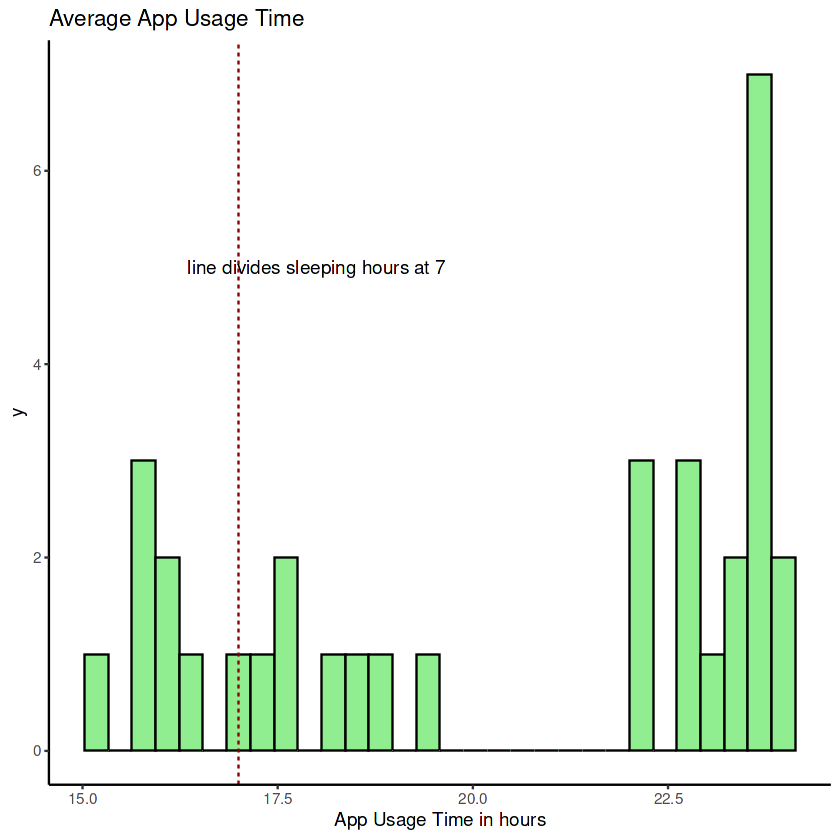

In [21]:
activity$total_time = rowSums(activity[c("VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes","SedentaryMinutes")])

activity %>% 
  group_by(Id) %>% 
  summarise(daily_usage_hour = mean(total_time/60)) %>% 
  ggplot() + geom_histogram(mapping = aes(x=daily_usage_hour), color = "black", fill = "lightgreen") +
  geom_vline(aes(xintercept=17), linetype="dashed", color = "darkred")+
  labs(title="Average App Usage Time", x = "App Usage Time in hours")+
  annotate("text",x=18,y=5,label="line divides sleeping hours at 7")+
  theme_classic()

First, we created a pie chart in addition to a bar graph to determine the percentage of users wearing the watch during the day. 
The visual representations revealed that 76% of users wear their watches over 17 hours throughout the day, meaning their watch is on their wrist even while sleeping.


#### **Percentage of people wearing the watch while asleep**

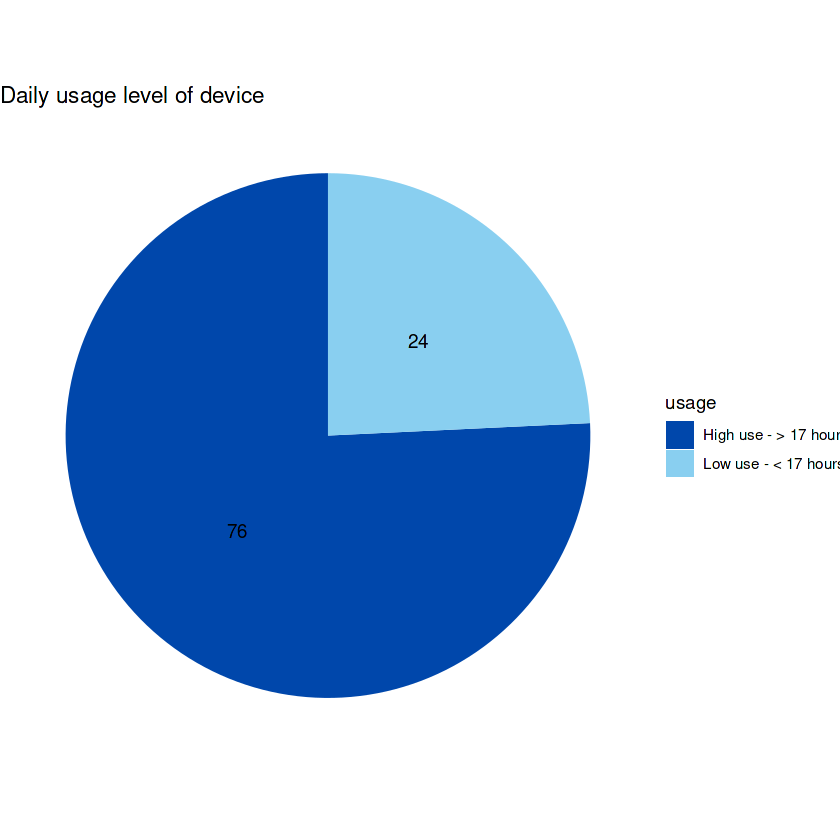

In [22]:
daily_usage <- activity %>% 
    group_by(Id) %>% 
    summarise(daily_usage_hour = mean(total_time/60)) %>%
    mutate(usage = case_when(
      daily_usage_hour >= 17 ~ "high",
      daily_usage_hour < 17 ~ "low"))

daily_usage %>%
  group_by(usage) %>%
  summarise(total=n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(usage) %>%
  summarise(percentage=total*100/totals) %>%
  ggplot(aes(x="",y=percentage, fill=usage)) +
  geom_bar(stat = "identity", width = 1)+
  coord_polar("y", start=0)+
  theme_void()+
  theme(panel.border = element_blank(), 
        panel.grid = element_blank())+
  geom_text(aes(label = round(percentage)),
            position = position_stack(vjust = 0.5))+
  scale_fill_manual(values = c("#0047AB","#89CFF0"),
                    labels = c("High use - > 17 hours",
                               "Low use - < 17 hours"))+
  labs(title="Daily usage level of device")

#### **Sleep Patterns**


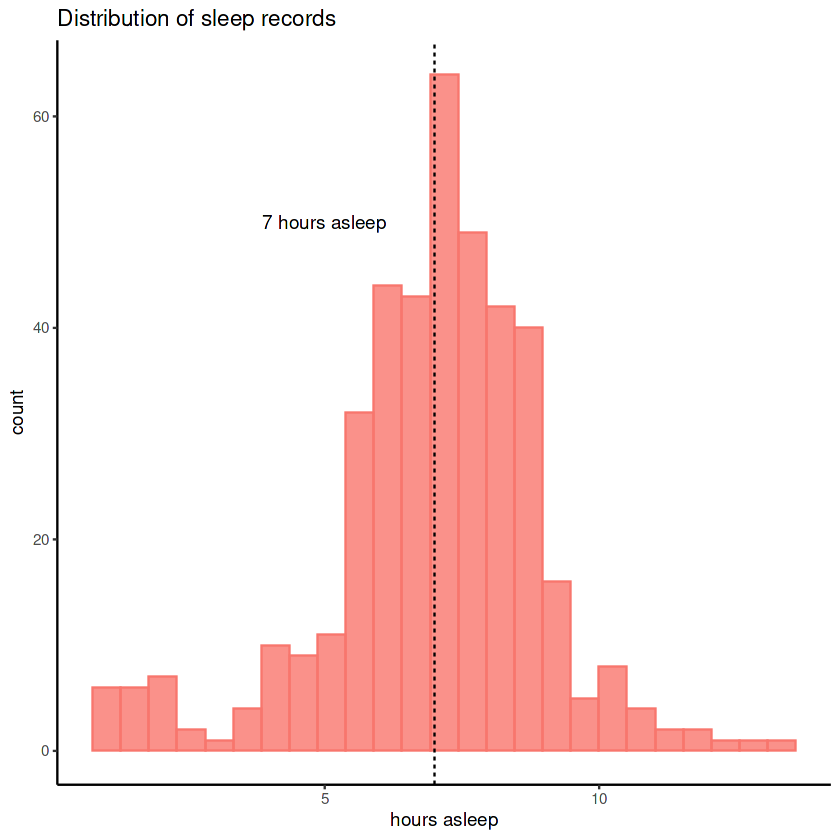

In [23]:
ggplot(data = sleep1) +
    geom_histogram(mapping = aes(x = TotalHoursAsleep, fill = 'red', color = 'black'), bins = 25, alpha = 0.8, show.legend = FALSE) +
    labs(title = "Distribution of sleep records", x = 'hours asleep') +
  geom_vline(aes(xintercept=7),linetype="dashed",colour="black")+
  annotate("text",x=5,y=50,label="7 hours asleep")+
  labs(y="count")+
    theme_classic()

Then, with a histogram and a few bar graphs, we were able to dive deep into the sleep pattern of the app users. 
We visualized that most app users don’t get enough sleep and only few users oversleep, and that people sleep for more hours on Sundays and Wednesdays.


#### **Categorizing sleeping hours**

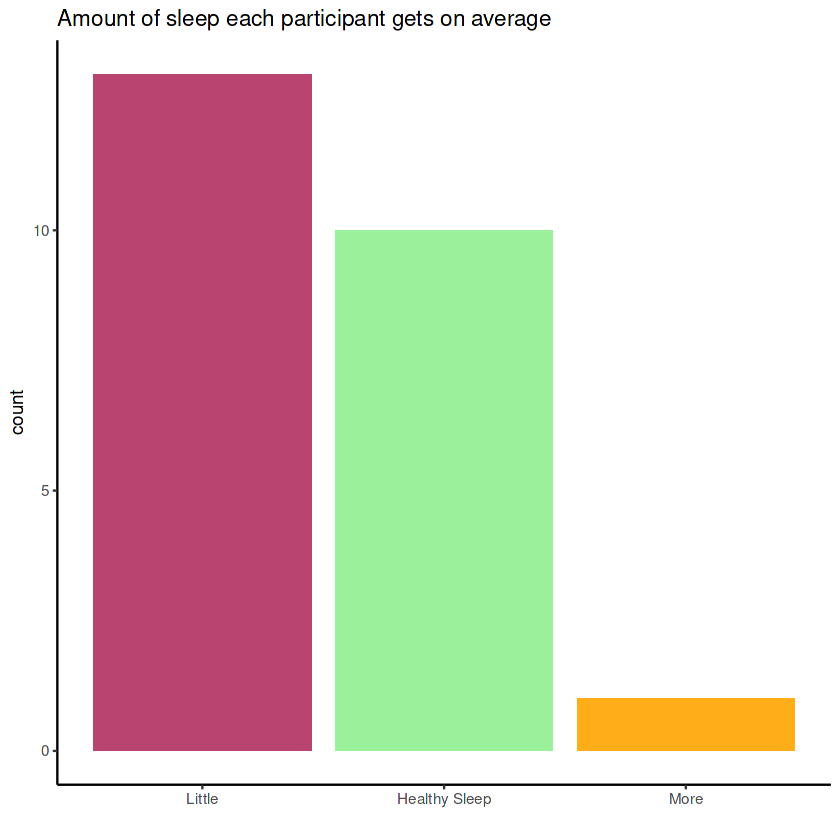

In [24]:
sleep_category <- sleep1 %>%
    group_by(Id) %>%
    summarise(AvgHoursAsleep = mean(TotalHoursAsleep))
sleep_category %>%
    mutate(
        AverageHoursAsleep = case_when(
            sleep_category$AvgHoursAsleep < 7 ~ "Little",
            sleep_category$AvgHoursAsleep  >= 7 &
                sleep_category$AvgHoursAsleep  <= 9 ~ "Healthy Sleep",
            sleep_category$AvgHoursAsleep  > 9 ~ "More"
        )) %>%
  ggplot(aes(x = fct_relevel(AverageHoursAsleep,"Little" ,"Healthy Sleep","More"), fill =AverageHoursAsleep)) +
    geom_bar(alpha = 0.9, show.legend = FALSE)+
  scale_fill_manual(values=c( "lightgreen","maroon", "orange"))+
    labs(title = "Amount of sleep each participant gets on average", x = "") +
    theme_classic()

The above visual summarizes that most app users dont get enough sleep and only few users oversleep.  


#### **Hours asleep per weekday**


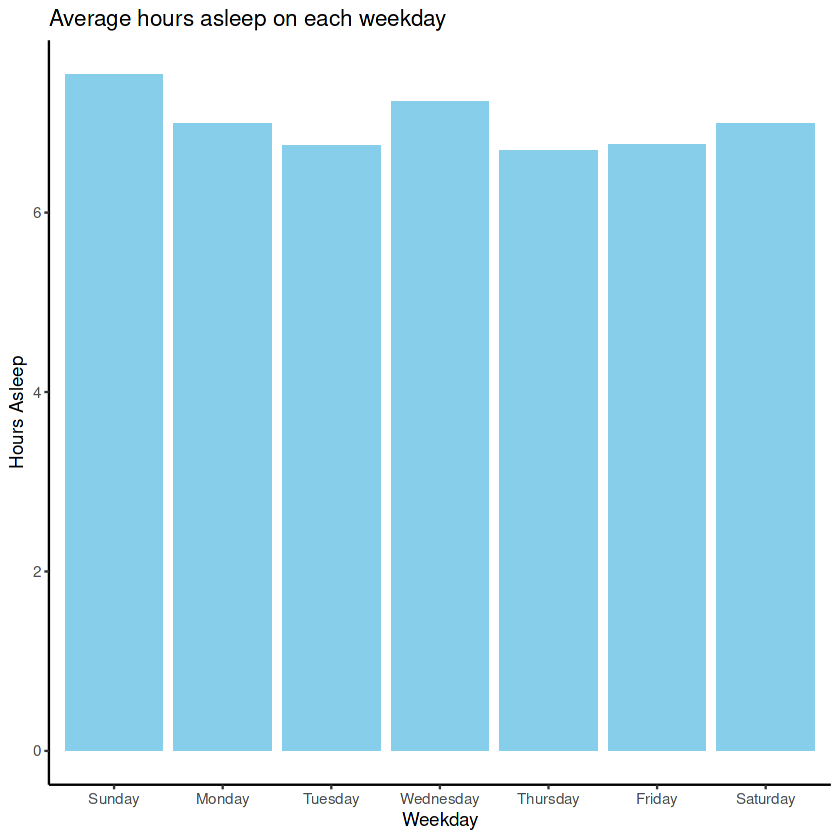

In [25]:
ggplot(data=sleep_summarize,aes(Weekday,avg_sleep))+
  geom_bar(stat="identity",fill="skyblue")+
  labs(title="Average hours asleep on each weekday",y="Hours Asleep")+
  theme_classic()

The bar graph helped us evaluate that that the total users step count is high on Sundays  followed by Wednesdays.


#### **Visualize total number of steps**


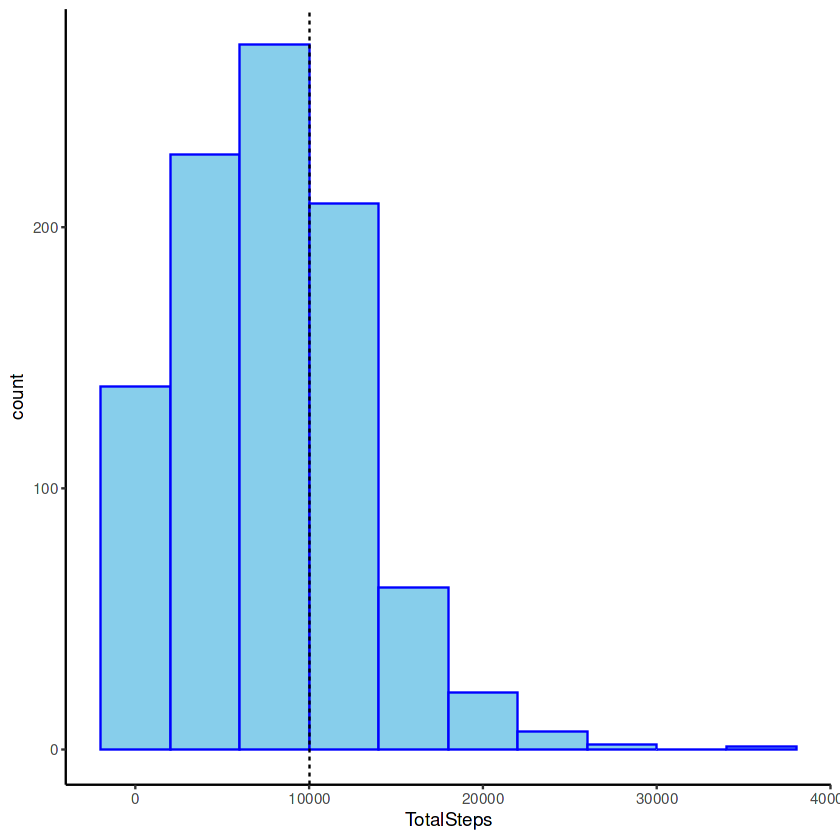

In [26]:
ggplot(data=activity)+
  geom_histogram(aes(x=TotalSteps),colour="blue",fill='skyblue',
                 bins=10,show.legend=FALSE)+
  geom_vline(aes(xintercept=10000),linetype="dashed",colour="black")+
  theme_classic()

As we can see that most of the people are walking close to 10000 steps. Lets categorize steps into 3 i.e, <7000, 7000-10000, >10000.


#### 5.7: Categoring daily step count.


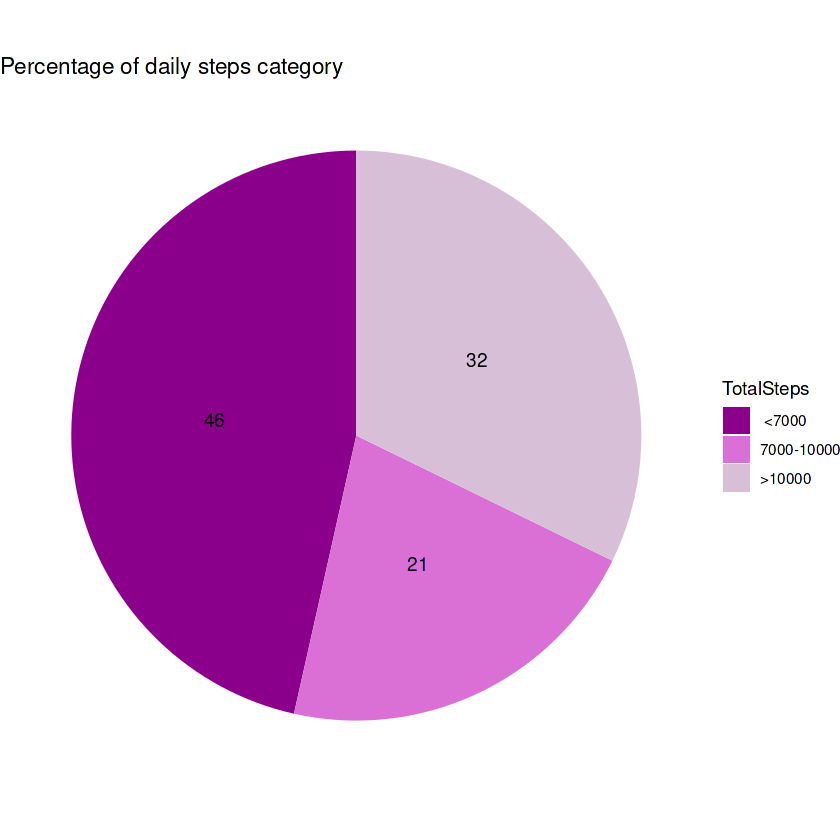

In [27]:
activity1 <- activity %>%
    mutate(
        TotalSteps = case_when(
            activity$TotalSteps < 7000 ~ "0-7,000",
            activity$TotalSteps >= 7000 &
                activity$TotalSteps < 10000 ~ "7,000-10,000",
            activity$TotalSteps >= 10000 ~ "More than 10,000"
        ))
activity1 %>%
  group_by(TotalSteps)%>%
  summarize(total=n())%>%
  mutate(sum_total=sum(total))%>%
  group_by(TotalSteps)%>%
  summarize(percentage=total*100/sum_total)%>%
  ggplot(aes(x="",y=percentage,fill=TotalSteps))+
  geom_bar(stat = "identity", width = 1)+
  coord_polar("y", start=0)+
  theme_void()+
  geom_text(aes(label = round(percentage)),
            position = position_stack(vjust = 0.5))+
  scale_fill_manual(values = c("#8B008B","#DA70D6","#D8BFD8"),
                    labels = c(" <7000",
                               "7000-10000",">10000"))+
  labs(title="Percentage of daily steps category")

The pie chart depicts that 21% of people are taking 7000-10000 steps daily and 46% of people daily step count is less than 7000. There is a chance of improvement here. 


#### **Average step count per each weekday**


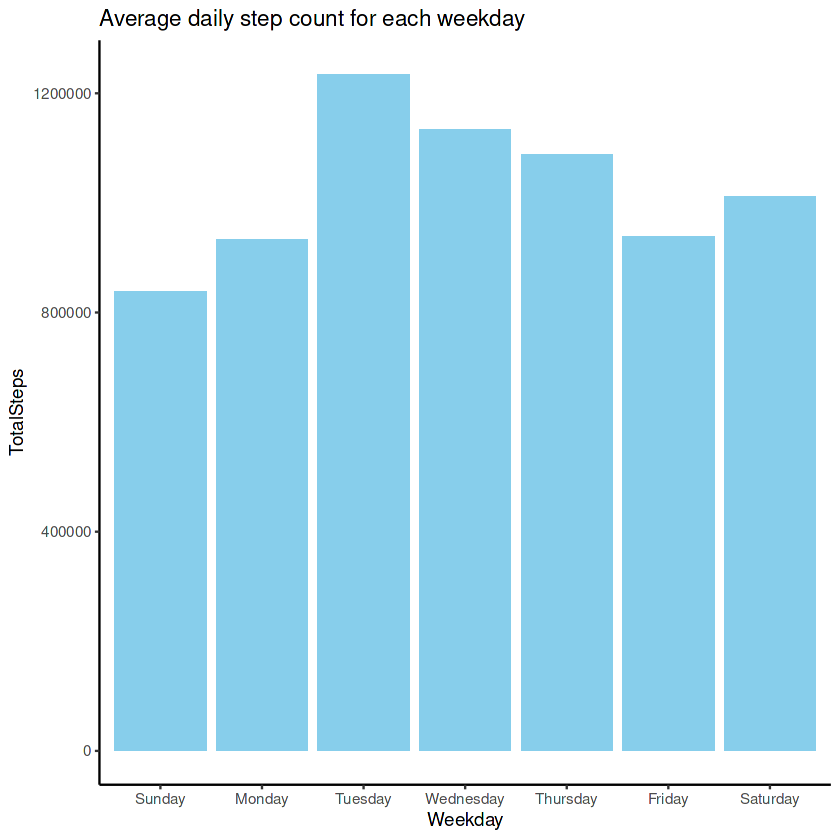

In [28]:
ggplot(data=activity_weekdays,aes(Weekday,TotalSteps))+
  geom_bar(stat='identity',fill='skyblue')+
  labs(title='Average daily step count for each weekday')+
  theme_classic()

From the above pie chart we can conclude that the total step count is high on Tuesdays followed by Wednesdays.


#### **Calories vs Step Count**


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


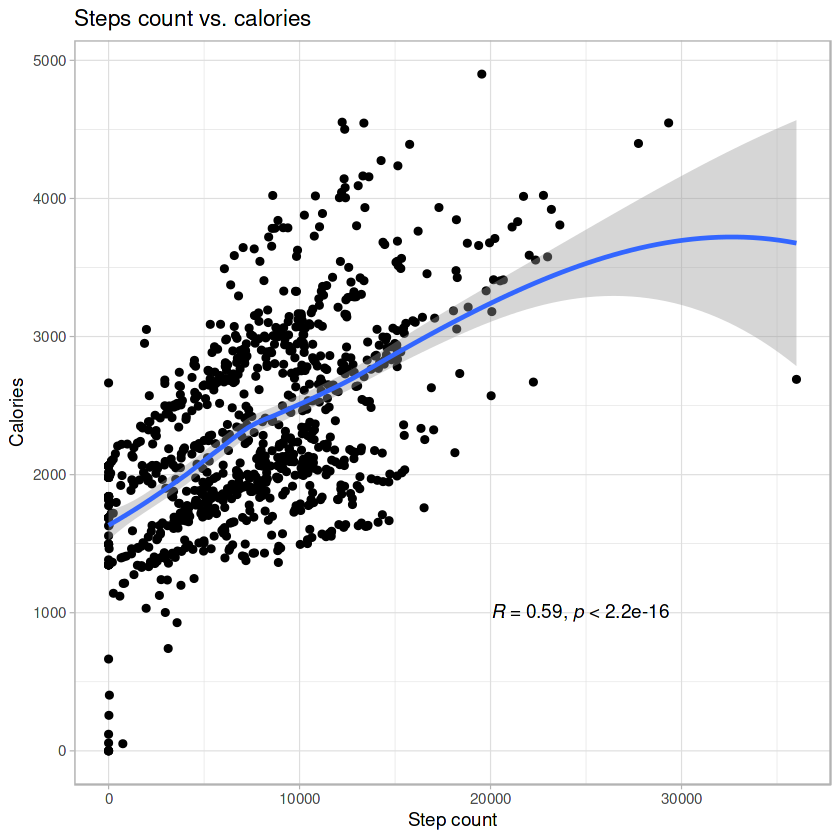

In [29]:
activity %>% 
  ggplot(aes( x = TotalSteps, y = Calories)) + geom_jitter()+
  geom_smooth() +
  stat_cor(method = "pearson", label.x = 20000, label.y = 1000) +
  labs(title= "Steps count vs. calories", x= "Step count", y="Calories")+
  theme_light()

#### **Calories vs Intensities**


`summarise()` has grouped output by 'day'. You can override using the `.groups`
argument.
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


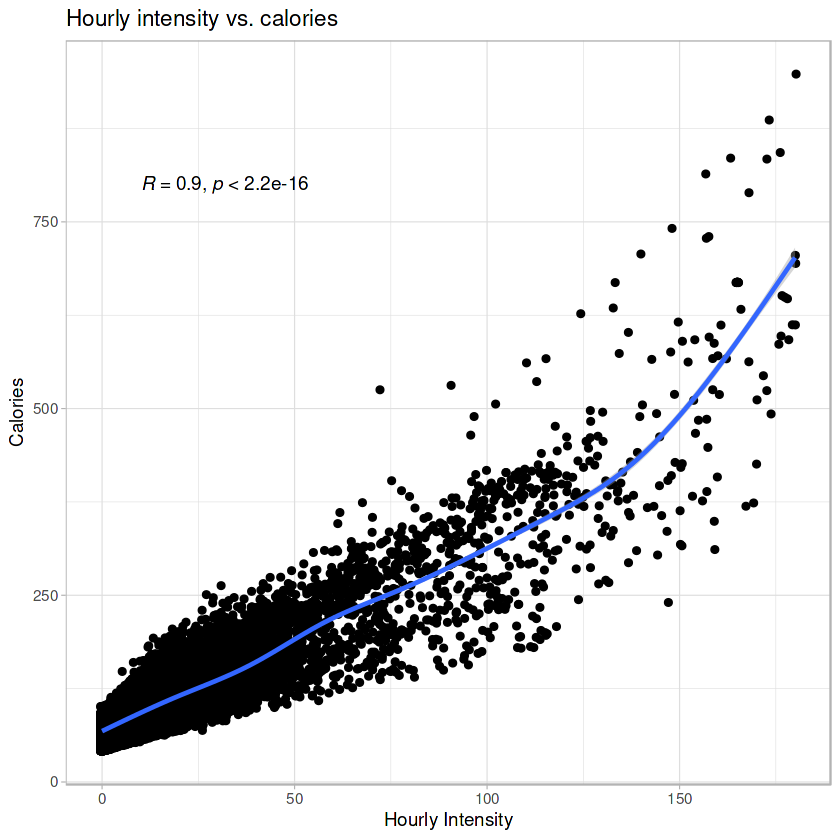

In [30]:
hourly_intensities$day <- format(hourly_intensities$ActivityHour, format = "%Y %m %d") 
hourly_intensities$calories <- cbind(hourly_calories$Calories)

hourly_intensities %>% 
  group_by(day) %>% 
  summarise(total_int = TotalIntensity, total_cal = calories) %>% 
  ggplot() + (mapping = aes( x = total_int, y = total_cal)) + geom_jitter()+
  geom_smooth() +
  stat_cor(method = "pearson", label.x = 10, label.y = 800)+
  theme_light()+
labs(title= "Hourly intensity vs. calories", x= "Hourly Intensity", y="Calories")

#### **Total intensity vs Time in a day**


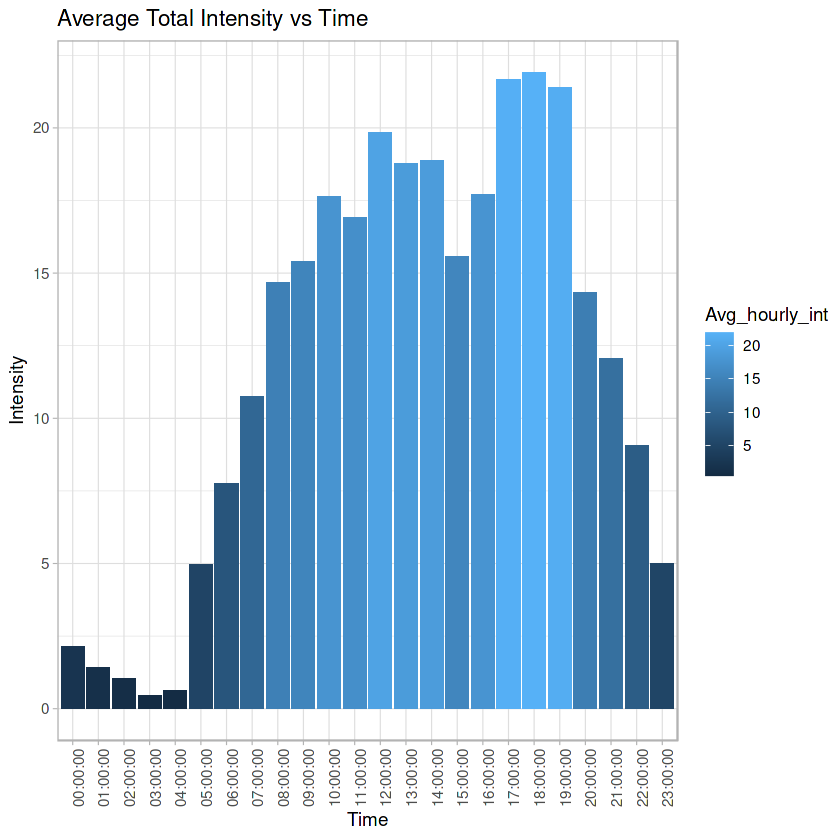

In [31]:
hourly_intensities$time <- format(hourly_intensities$ActivityHour, format = "%H:%M:%S")

hourly_intensities %>%
  group_by(time) %>%
  summarise(Avg_hourly_int = mean(TotalIntensity)) %>% 
  ggplot() +
  geom_col(mapping = aes(x=time, y = Avg_hourly_int, fill = Avg_hourly_int)) + 
  theme_light()+
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title="Average Total Intensity vs Time", x= "Time", y="Intensity")

#### **Activity intensity vs Weekday**


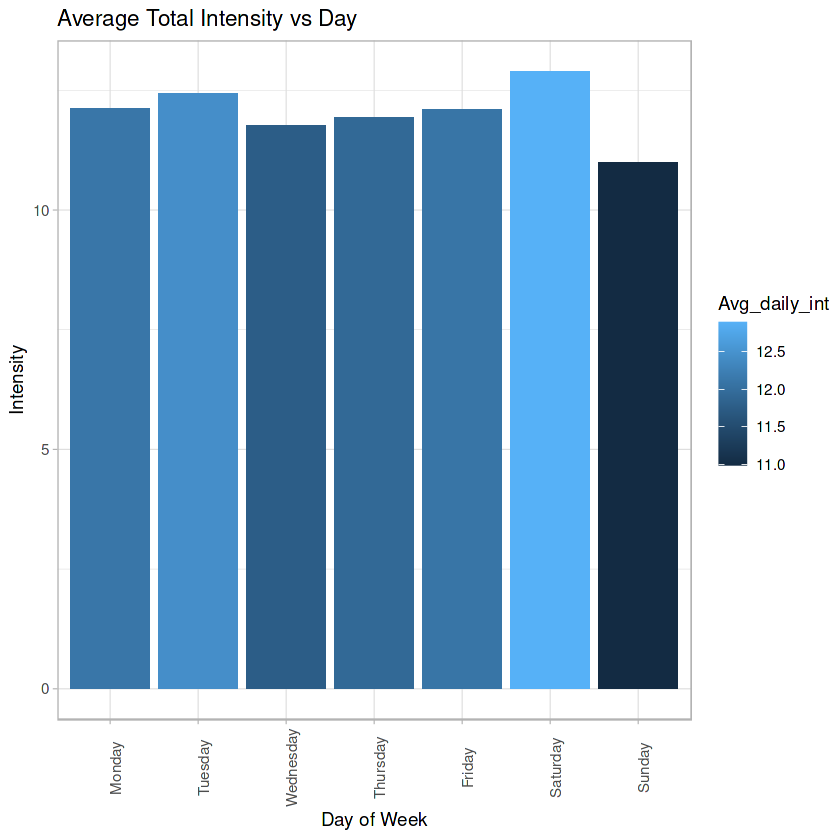

In [32]:
hourly_intensities$weekday <- weekdays(hourly_intensities$ActivityHour)
hourly_intensities$weekday <- factor(hourly_intensities$weekday,levels = c("Monday", "Tuesday", "Wednesday","Thursday", "Friday", "Saturday", "Sunday"))

hourly_intensities %>%
  group_by(weekday) %>%
  summarise(Avg_daily_int = mean(TotalIntensity)) %>% 
  ggplot() +
  geom_col(mapping = aes(x=weekday, y = Avg_daily_int, fill = Avg_daily_int)) +
  theme_light()+
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title="Average Total Intensity vs Day", x= "Day of Week", y="Intensity")

#### **Heat plot between Time in a day, Weekday and activity intensity**


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


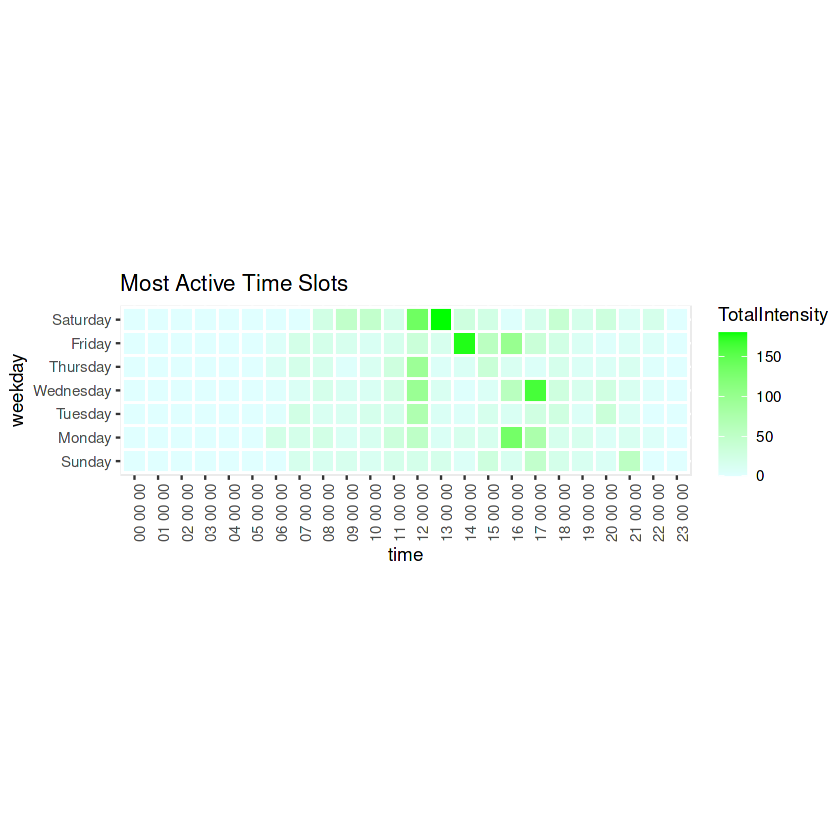

In [33]:
hourly_intensities$weekday <- weekdays(hourly_intensities$ActivityHour)
hourly_intensities$weekday <- factor(hourly_intensities$weekday,levels = c( "Sunday","Monday", "Tuesday", "Wednesday","Thursday", "Friday", "Saturday"))
hourly_intensities$time <- format(hourly_intensities$ActivityHour, format = "%H %M %S")  

hourly_intensities %>% 
  group_by(time, weekday) %>% 
  ggplot(hourly_intensities, mapping = aes(x= time, y= weekday,fill= TotalIntensity)) +
  labs(title= "Most Active Time Slots") + 
  theme(axis.text.x= element_text(angle = 90))+
  geom_tile(color= "white",lwd =.6,linetype =1)+
  coord_fixed()+
  scale_fill_gradient(low= "lightcyan1", high="green")

Last, we were able to figure out that there is considerable amount of correlation (r = 0.9) between intensity and calories. 

The more the intensity, the more the calories burnt. Also, the activity intensity is peak between 5pm and 7pm, on Saturday and Tuesday. 

Overall, most of the app users fall into the overweight category.


#### **Visualizing BMI**


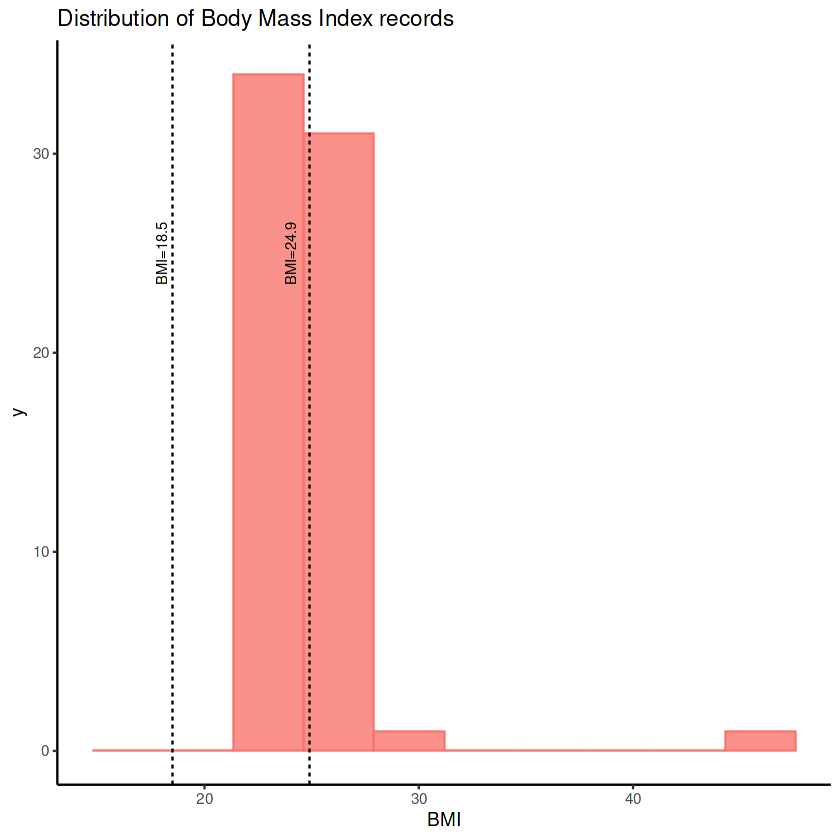

In [34]:
ggplot(data = weight) +
    geom_histogram(mapping = aes(x = BMI, color = "red", fill = "red"), 
                   bins = 10, alpha = 0.8, show.legend = FALSE) +
    labs(title = "Distribution of Body Mass Index records") +
  geom_vline(aes(xintercept=18.5),linetype="dashed",colour='black')+
  geom_vline(aes(xintercept=24.9),linetype="dashed",colour='black')+
  annotate("text",x=18,y=25,label="BMI=18.5",angle='90',size=3)+
  annotate("text",x=24,y=25,label="BMI=24.9",angle='90',size=3)+
    theme_classic()

#### **Categorizing weights**


Warning message:
“1 unknown level in `f`: Underweight”
Warning message:
“1 unknown level in `f`: Underweight”


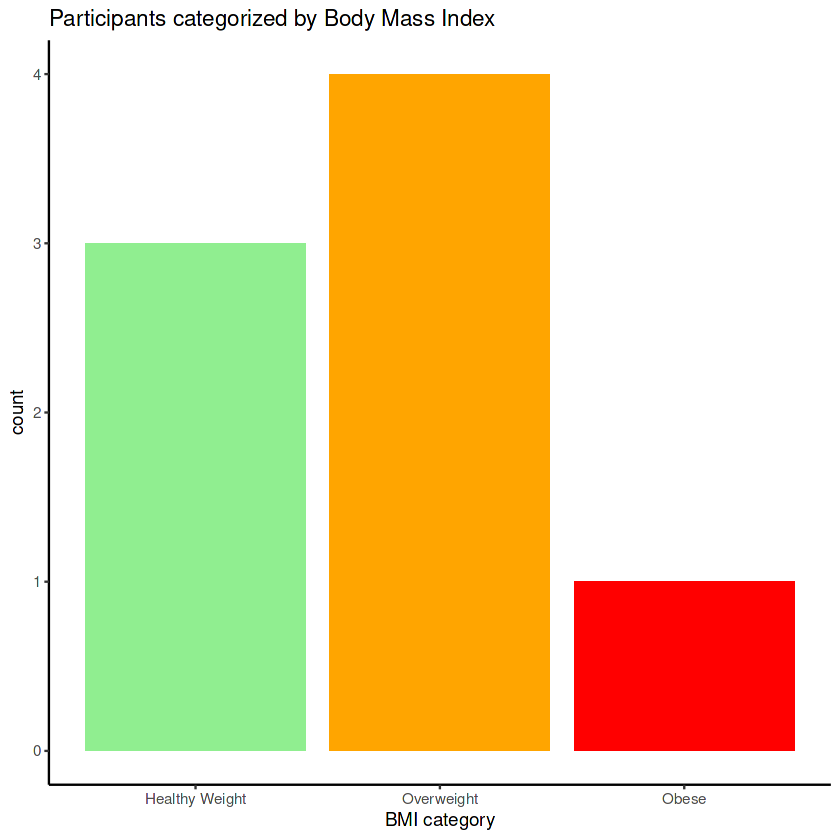

In [35]:
weight_grouped <- weight %>%
    group_by(Id) %>%
    summarise(BMI = mean(BMI))
weight_grouped %>%
    mutate(
        BMI = case_when(
            weight_grouped$BMI < 18.5 ~ "Underweight",
            weight_grouped$BMI >= 18.5 &
                weight_grouped$BMI < 25 ~ "Healthy Weight",
            weight_grouped$BMI >= 25 &
                weight_grouped$BMI < 30 ~ "Overweight",
            weight_grouped$BMI >= 30 ~ "Obese"
        ))%>%
  ggplot(aes(x = fct_relevel(BMI,"Underweight","Healthy Weight","Overweight","Obese"), fill = BMI)) +
    geom_bar(show.legend = FALSE) +
    labs(title = "Participants categorized by Body Mass Index", x = "BMI category") +
    scale_fill_manual(values=c("lightgreen","red","orange")) +
    theme_classic()


## **The ACT/RECOMMENDATION Phase:**


* Despite the small sample size at hand, valuable conclusions could still be drawn from the analyzed data that can serve the marketing team.

* First, nearly 24% of the users do not wear the device while sleeping. So, encouraging users to use leaf model to use for example a necklace device can be beneficial in collecting user data.
* Second, majority of our users sleep less. Sleep reminders, customized sleep schedules can be provided to the users. To help users to make new bed-time routine, we can prepare some calming music, exercises to them in the app.

* Also, almost 50% of users are walking less than 7000 steps which less than the required step count. Making the app more user-friendly and giving rewards for completing each day’s goal can help users to push themselves to reach their day’s step count goal.

* Last, majority of the users are overweight. Personalized diet plans to control weight and keep a normal BMI is an area for improvement.